<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-06-16 10:11:18
-------------------
qualified stocks: 92
with latest results: 29
still star stocks: 17
-------------------
Initial Investment:  1.17 C
CY Investment:  1.44 C
Reserve:  1.50 L
Current:  1.32 C
-------------------
Today PnL: -1.02 L (-0.77%)
Current PnL: -17.34 L (-12.08%)
CY Booked + Current PnL: -10.97 L (-7.64%)
-------------------
Total profit:  2.76 L
Total loss:  -20.11 L
-------------------
Total Booked + Current PnL: 16.01 L (13.74%)
Total Booked PnL: 33.35 L (28.62%)
Curr Year Booked PnL: 6.37 L (4.83%)
Prev Year Booked PnL: 26.98 L (23.15%)
Est FTT:  2.05 C
Est FTT PnL: 73.46 L (55.71%)
Deployed:  1.17 C
Current:  1.32 C
CAGR/XIRR %: 8.6%


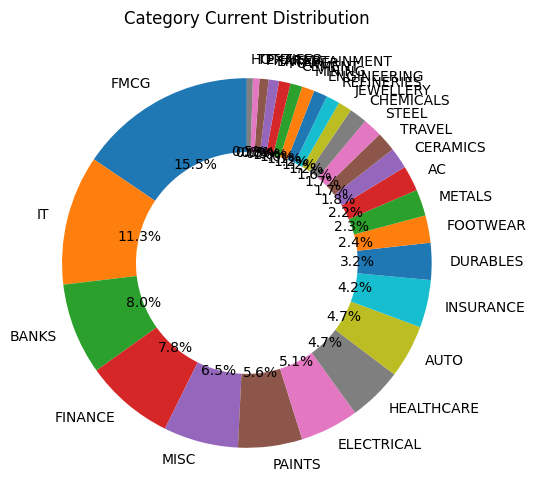

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSI_14', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
51,LICI,827.06,983.00,-15.22,H-LC,60.0,90.22,96305.0,11118.0,4940.0,...,5.13,18.85,202.0,35.0,2.25,0.74,28.22,XY25,NTT,INSURANCE
61,RELIANCE,1291.83,1526.00,4.55,X-LC,55.0,35.87,155870.0,15061.0,10459.0,...,6.71,18.13,67.0,17.0,1.44,1.20,23.07,XY25,NTT,REFINERIES
3,ADANIPORTS,1103.69,1583.00,-1.23,M-LC,51.0,43.48,99286.0,20924.0,13106.0,...,13.20,43.43,NaN,77.0,1.60,0.76,33.44,XY24,NTT,MISC
83,UJJIVANSFB,52.77,53.00,48.19,M-SC,58.0,83.70,128682.0,-13797.0,14412.0,...,11.20,0.44,-27.0,242.0,-0.96,0.99,51.88,OX40N,NTT,BANKS
77,TATAELXSI,7332.28,7332.00,-16.13,X-MC,52.0,61.96,88046.0,-14606.0,14598.0,...,16.58,-0.00,-10.0,57.0,-1.00,0.68,33.84,OX40N,NTT,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,SAIL,130.64,228.00,82.87,M-MC,52.0,71.74,219796.0,-5166.0,172826.0,...,78.63,74.53,-18.0,184.0,-0.03,1.69,27.61,XY24,BTT,STEEL
9,AWL,325.39,485.00,-68.74,H-MC,46.0,30.98,217388.0,-51059.0,182736.0,...,84.06,49.05,-36.0,98.0,-0.28,1.67,11.77,XY24,NTT,FMCG
62,REPCOHOME,515.07,880.00,-54.55,H-SC,57.0,47.28,166603.0,-38395.0,183630.0,...,110.22,70.85,-44.0,134.0,-0.21,1.28,34.49,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-32.36,H-SC,53.0,58.70,201260.0,-47270.0,262745.0,...,130.55,86.70,-29.0,130.0,-0.18,1.54,33.14,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,5551.76,7934.00,-34.71,H-LC,55.0,65.22,233084.0,16565.0,76335.0,...,32.75,42.91,NaN,27.0,0.22,1.79,21.83,AR,NTT,ELECTRICAL
2,ACC,2579.05,3906.00,-37.64,M-MC,36.0,21.74,134269.0,-54002.0,150865.0,...,112.36,51.45,-37.0,168.0,-0.36,1.03,2.09,XY24,BTT,CEMENT
3,ADANIPORTS,1103.69,1583.00,-1.23,M-LC,51.0,43.48,99286.0,20924.0,13106.0,...,13.20,43.43,NaN,77.0,1.60,0.76,33.44,XY24,NTT,MISC
4,ALKYLAMINE,2347.98,4567.52,-9.38,X-SC,60.0,92.39,84405.0,-16558.0,111997.0,...,132.69,94.53,-59.0,60.0,-0.15,0.65,25.14,SR,ATH,CHEMICALS
5,APOLLOHOSP,6904.43,8285.00,-22.83,H-LC,56.0,44.57,105150.0,1584.0,19127.0,...,18.19,20.00,NaN,32.0,0.08,0.81,15.82,X40N,BTT,HEALTHCARE
6,ASIANPAINT,2961.56,4250.00,-23.83,H-LC,40.0,18.48,151239.0,-50147.0,137764.0,...,91.09,43.51,-18.0,33.0,-0.36,1.16,5.28,X40,BTT,PAINTS
9,AWL,325.39,485.00,-68.74,H-MC,46.0,30.98,217388.0,-51059.0,182736.0,...,84.06,49.05,-36.0,98.0,-0.28,1.67,11.77,XY24,NTT,FMCG
10,BAJAJHFL,122.26,152.00,-4.66,H-LC,42.0,28.80,197981.0,-2525.0,51297.0,...,25.91,24.33,NaN,78.0,-0.05,1.52,14.17,X40N,BTT,FINANCE
12,BANKINDIA,116.91,190.00,-30.06,M-MC,48.0,70.65,183283.0,3475.0,108943.0,...,59.44,62.52,-12.0,170.0,0.03,1.41,31.90,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-32.87,M-SC,41.0,26.09,100430.0,-28240.0,73535.0,...,73.22,35.20,-8.0,208.0,-0.38,0.77,2.46,X40,NTT,FOOTWEAR


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,565.0,145.19,H-SC,49.0,51.09,132284.0,-54648.0,54726.0,...,41.37,0.04,20.0,149.0,-1.00,1.01,26.55,OX40N,NTT,FINANCE
19,CERA,8421.60,8422.0,-12.89,X-SC,68.0,79.35,89895.0,-19586.0,19588.0,...,21.79,0.00,-57.0,65.0,-1.00,0.69,36.06,OX40N,NTT,CERAMICS
41,INDIGOPNTS,1407.73,1408.0,102.01,H-SC,52.0,67.39,132382.0,-42177.0,42203.0,...,31.88,0.02,-1.0,127.0,-1.00,1.02,14.80,OX40N,NTT,PAINTS
45,JCHAC,2282.24,2282.0,20139.13,M-SC,60.0,47.28,98902.0,-28903.0,28889.0,...,29.21,-0.01,-57.0,218.0,-1.00,0.76,9.77,OX40N,NTT,AC
48,KANSAINER,299.63,340.0,-68.93,H-SC,32.0,5.43,216585.0,-53082.0,89406.0,...,41.28,13.47,-30.0,144.0,-0.59,1.66,8.41,XY24,NTT,PAINTS
59,RAJESHEXPO,517.65,518.0,1767.42,M-SC,44.0,16.30,50960.0,-86217.0,86311.0,...,169.37,0.07,-49.0,232.0,-1.00,0.39,26.74,OX40N,NTT,JEWELLERY
68,SFL,1016.35,1287.0,30.77,H-SC,57.0,63.04,172654.0,-89564.0,159394.0,...,92.32,26.63,-13.0,145.0,-0.56,1.32,7.35,XY24,NTT,MISC
71,SIS,477.00,477.0,2211.40,M-SC,59.0,91.30,62186.0,-18904.0,18905.0,...,30.40,0.00,-28.0,225.0,-1.00,0.48,26.03,OX40N,NTT,MISC
75,SYMPHONY,1306.42,1306.0,-30.70,M-SC,35.0,2.17,147768.0,-23373.0,23318.0,...,15.78,-0.03,75.0,190.0,-1.00,1.13,6.20,OX40N,NTT,DURABLES
77,TATAELXSI,7332.28,7332.0,-16.13,X-MC,52.0,61.96,88046.0,-14606.0,14598.0,...,16.58,-0.00,-10.0,57.0,-1.00,0.68,33.84,OX40N,NTT,IT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ACC,2579.05,3906.00,-37.64,M-MC,36.0,21.74,134269.0,-54002.0,150865.0,...,112.36,51.45,-37.0,168.0,-0.36,1.03,2.09,XY24,BTT,CEMENT
3,ADANIPORTS,1103.69,1583.00,-1.23,M-LC,51.0,43.48,99286.0,20924.0,13106.0,...,13.20,43.43,NaN,77.0,1.60,0.76,33.44,XY24,NTT,MISC
8,ATULAUTO,624.44,844.00,3397.30,M-SC,40.0,14.13,108961.0,-38407.0,90220.0,...,82.80,35.16,-49.0,230.0,-0.43,0.84,11.29,XY24,NTT,AUTO
9,AWL,325.39,485.00,-68.74,H-MC,46.0,30.98,217388.0,-51059.0,182736.0,...,84.06,49.05,-36.0,98.0,-0.28,1.67,11.77,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.00,-32.36,H-SC,53.0,58.70,201260.0,-47270.0,262745.0,...,130.55,86.70,-29.0,130.0,-0.18,1.54,33.14,XY24,NTT,BANKS
14,BERGEPAINT,561.33,680.00,-18.19,H-MC,56.0,41.30,231579.0,4240.0,43815.0,...,18.92,21.14,-14.0,117.0,0.10,1.78,29.66,XY24,NTT,PAINTS
15,BRITANNIA,4983.33,6446.05,10.87,X-LC,51.0,48.91,254380.0,25147.0,42151.0,...,16.57,29.35,239.0,7.0,0.60,1.95,20.87,XY25,ATH,FMCG
17,CAMPUS,294.86,393.00,-24.24,M-SC,50.0,84.78,157869.0,-9906.0,65752.0,...,41.65,33.28,-16.0,201.0,-0.15,1.21,22.22,XY24,NTT,FOOTWEAR
21,COALINDIA,406.65,512.15,3.03,L-LC,41.0,22.83,143930.0,-6530.0,45568.0,...,31.66,25.94,NaN,159.0,-0.14,1.10,9.82,XY25,ATH,MINING
23,COLPAL,2714.63,3767.14,-2.30,X-MC,34.0,3.26,184322.0,-27419.0,109524.0,...,59.42,38.77,-21.0,51.0,-0.25,1.41,1.63,XY25,ATH,FMCG


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,5551.76,7934.00,-34.71,H-LC,55.0,65.22,233084.0,16565.0,76335.0,...,32.75,42.91,NaN,27.0,0.22,1.79,21.83,AR,NTT,ELECTRICAL
4,ALKYLAMINE,2347.98,4567.52,-9.38,X-SC,60.0,92.39,84405.0,-16558.0,111997.0,...,132.69,94.53,-59.0,60.0,-0.15,0.65,25.14,SR,ATH,CHEMICALS
7,ASIANTILES,75.41,137.00,7316.67,M-SC,75.0,100.00,81370.0,-12440.0,89059.0,...,109.45,81.67,-16.0,238.0,-0.14,0.62,57.58,XR,NTT,CERAMICS
12,BANKINDIA,116.91,190.00,-30.06,M-MC,48.0,70.65,183283.0,3475.0,108943.0,...,59.44,62.52,-12.0,170.0,0.03,1.41,31.90,XR,NTT,BANKS
16,BSOFT,628.85,844.81,-14.76,M-SC,48.0,19.57,71732.0,-38317.0,76108.0,...,106.10,34.34,-28.0,204.0,-0.50,0.55,18.09,XR,ATH,IT
22,COFFEEDAY,59.14,80.00,-53.72,L-SC,61.0,98.91,68256.0,-45293.0,85347.0,...,125.04,35.27,NaN,260.0,-0.53,0.52,67.06,XR,NTT,HOTELS
25,DEN,52.79,75.00,104.66,L-SC,51.0,56.52,57440.0,-27024.0,62558.0,...,108.91,42.07,-21.0,256.0,-0.43,0.44,21.98,AR,NTT,ENTERTAINMENT
29,HAPPSTMNDS,919.80,1491.84,-10.35,M-SC,46.0,38.04,62585.0,-33994.0,94059.0,...,150.29,62.19,-22.0,203.0,-0.36,0.48,9.74,AR,ATH,IT
30,HATHWAY,19.74,31.40,961.59,L-SC,49.0,54.35,60880.0,-18080.0,64722.0,...,106.31,59.07,-18.0,259.0,-0.28,0.47,22.15,XR,NTT,ENTERTAINMENT
33,HEROMOTOCO,4311.81,6039.03,-5.71,H-MC,60.0,45.65,152040.0,1127.0,59326.0,...,39.02,40.06,NaN,100.0,0.02,1.17,24.36,AR,ATH,AUTO


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.66
1,20,35.70
2,30,49.52


In [21]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,42.11
LC,36.87
MC,21.06


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.54
XY25,14.18
X40,12.58
XR,10.44
X40N,9.90
OX40N,8.39
AR,8.01
X5K,2.31
X200,1.50


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,18.58
M-SC,16.56
X-LC,13.71
H-LC,13.68
M-LC,8.38
H-MC,8.29
X-MC,7.73
M-MC,5.04
X-SC,4.53


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.19
XY25      X-LC          7.28
XY24      M-SC          6.55
          M-LC          5.55
X40N      H-LC          5.03
X40       X-LC          4.29
OX40N     M-SC          3.75
XY24      M-MC          3.63
          H-MC          3.45
X40       X-MC          3.37
XR        M-SC          3.22
X40       H-LC          3.06
AR        H-SC          2.83
OX40N     H-SC          2.65
X40N      H-SC          2.49
XR        H-SC          2.42
AR        H-LC          1.79
XY24      X-SC          1.76
XY25      M-LC          1.60
X5K       H-LC          1.56
X40N      X-LC          1.51
X200      H-LC          1.50
XY25      H-MC          1.47
          X-MC          1.41
XR        M-MC          1.41
XY24      X-MC          1.40
OX40N     X-SC          1.31
XR        M-LC          1.23
AR        H-MC          1.17
          M-SC          1.15
XY25      L-LC          1.10
X40       H-MC          1.09
XY24      L-SC          1.01
XR        L-SC          0.99
X40N      X-MC          0.87
XR        X-SC          0.81
X40       M-SC          0.77
X5K       H-MC          0.75
XY25      H-LC          0.74
OX40N     X-MC          0.68
SR        X-SC          0.65
AR        X-LC          0.63
XY25      M-SC          0.58
SR        M-SC          0.54
AR        L-SC          0.44
XR        H-MC          0.36
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.52,-3.41,38.00
IT,11.36,-12.26,69.28
BANKS,8.01,-9.33,53.95
FINANCE,7.81,-18.31,61.05
MISC,6.54,-26.88,76.36
PAINTS,5.62,-19.29,42.80
ELECTRICAL,5.12,-5.23,50.80
HEALTHCARE,4.75,-4.31,34.79
AUTO,4.66,-11.36,60.33


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,72.78,9484171.0,-10.37,-983714.0,51.27,4862957.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,60.48,7881587.0,-4.8,-378111.0,42.66,3362060.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2822633.0
XR,1097446.0
AR,1026280.0
X40,679979.0
XY25,538122.0
X40N,488855.0
OX40N,337689.0
SR,190652.0
X5K,100382.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,1943197.0
M-SC,1785513.0
H-LC,590121.0
X-LC,555411.0
M-MC,511652.0
H-MC,509591.0
X-MC,443871.0
M-LC,350666.0
X-SC,330044.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          923996.0
          M-SC          809086.0
AR        H-SC          527827.0
XY24      M-MC          402709.0
XR        M-SC          350288.0
X40       X-LC          238235.0
XY24      M-LC          231038.0
          H-MC          226551.0
XR        H-SC          211492.0
X40N      H-LC          200828.0
AR        M-SC          182592.0
X40       H-LC          177363.0
OX40N     M-SC          171835.0
X40N      H-SC          168298.0
X40       X-MC          154409.0
XR        L-SC          150069.0
XY25      X-LC          140934.0
XR        X-SC          120739.0
XY25      M-SC          119522.0
AR        X-LC          117642.0
SR        X-SC          111997.0
OX40N     H-SC          111584.0
XY25      X-MC          109524.0
XR        M-MC          108943.0
XY24      X-MC          104211.0
XR        M-LC           99730.0
XY25      H-MC           97736.0
SR        M-SC           78655.0
AR        H-LC           76335.0
X40       M-SC           73535.0
XY24      L-SC           67406.0
X5K       H-LC           67026.0
X200      H-LC           63629.0
AR        L-SC           62558.0
X40N      X-MC           61129.0
AR        H-MC           59326.0
X40N      X-LC           58600.0
XY24      X-SC           57636.0
XR        H-MC           56185.0
XY25      L-LC           45568.0
OX40N     X-SC           39672.0
X40       H-MC           36437.0
X5K       H-MC           33356.0
XY25      M-LC           19898.0
OX40N     X-MC           14598.0
XY25      H-LC            4940.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,21
H-SC,18
H-LC,12
X-LC,8
H-MC,7
X-MC,6
M-LC,6
X-SC,5
M-MC,4
